<a target="_blank" href="https://colab.research.google.com/github/https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day25.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Search, Removal and Balancing Binary Search Trees 🌳
## Day25

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, December 5th, 2024
### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements

## You should be working on:
- [Final Project](https://analytics.drake.edu/~moore/CS66-F24/FinalProject.html), due 12/12 by 11:59 pm, to Blackboard.
- Exam #3 will be released at 12:15 pm today, and will also be due 12/12 by 11:59 pm.

## Course Evaluations

If you haven't already done so, please fill out the course evaluations:

[https://drake.qualtrics.com/jfe/form/SV_cuUpItUHL9vmzLE](https://drake.qualtrics.com/jfe/form/SV_cuUpItUHL9vmzLE)

## References for this lecture

Problem Solving with Algorithms and Data Structures using Python

Sections 7.11 - 7.14: [https://runestone.academy/runestone/books/published/pythonds/Trees/toctree.html](https://runestone.academy/runestone/books/published/pythonds/Trees/toctree.html)


## Review: Binary Search Tree Nodes

BST Nodes have at most 2 children, called _left child_ and _right child_

Nodes in left subtree have value less than this node

Nodes in right subtree have value more than this node

This is true for every node!

<center>
<div>
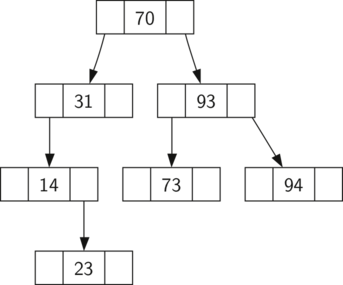
</div>
</center>



## Group Exercise:

Build a binary search tree for the following two lists of numbers:

```python
listA = [17, 35, 51, 2, 38, 11, 9, 8, 29]
listB = [2, 8, 9, 11, 17, 29, 35, 38, 51]
```

What do you notice about these two trees? 
- how would the time complexity of searching differ for these two trees? Why?

## Binary Search Tree Code from last time

Here's the code we came up with in class last time

In [1]:
class BSTNode:
    def __init__(self,initdata):
        self.data = initdata
        self.left = None
        self.right = None

        
    def __repr__(self):
        return repr(self.data)+"("+repr(self.left)+","+repr(self.right)+")"
        
        
    def __str__(self):
        str_rep = ""
        if self.left != None:
            str_rep += " "+str(self.left)
        str_rep += " "+str(self.data)
        if self.right != None:
            str_rep += " "+str(self.right)
        return str_rep
            
        
    def getData(self):
        return self.data

    def setData(self,newdata):
        self.data = newdata
        
    def getLeft(self):
        return self.left

    def setLeft(self,newleft):
        self.left = newleft
        
    def getRight(self):
        return self.right

    def setRight(self,newright):
        self.right = newright
        
    #put this method into BSTNode class
    def add(self,new_val):
        #implement the code here
        
        if new_val < self.data:
            if self.left == None:
                new_node = BSTNode(new_val)
                self.setLeft( new_node  )
            else:
                self.getLeft().add(new_val)
        elif new_val > self.data:
            if self.right == None:
                new_node = BSTNode(new_val)
                self.setRight( new_node )
            else:
                self.getRight().add(new_val)
        else:
            raise Exception("trying to add duplicate "+str(new_val))
                
        
        
class BSTSet:
    def __init__(self):
        self.__root = None #start with an empty tree!
        
    def add(self,new_val):
        if self.__root == None:
            self.__root = BSTNode(new_val)
        else:
            self.__root.add(new_val)
    
    def __repr__(self):
        return repr(self.__root)
    
    def __str__(self):
        return str(self.__root)
            
myset = BSTSet()
myset.add(4)
myset.add(7)
myset.add(2)
myset.add(9)
print(repr(myset))
print(str(myset))

4(2(None,None),7(None,9(None,None)))
  2 4  7  9


## Group Activity Problem 1

Implement a `search` method in the `BSTNode` class - again use recursion.

Write the associated method in `BSTSet` (suggestion: call it `__contains__` in `BSTSet` so that you can use it with the `in` operator.

In [ ]:
myset = BSTSet()
myset.add(4)
myset.add(7)
myset.add(2)
myset.add(9)

print( 7 in myset ) #should be True
print( 1 in myset ) #should be False

## Group Activity Problem 2

What would the tree look like in a worst-case search? So then what is the computational complexity of your search? What about `add`?

After you a good guess, check out [https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeAnalysis.html](https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeAnalysis.html) to see if you agree with the book.

## Removing Items

Removing nodes is the most difficult part.

Three cases to consider:
1. The node has no children
    * set the reference to it from the parent to None

<center>
<div>
<img src="bstdel1.png" width="700"/>
</div>
</center>

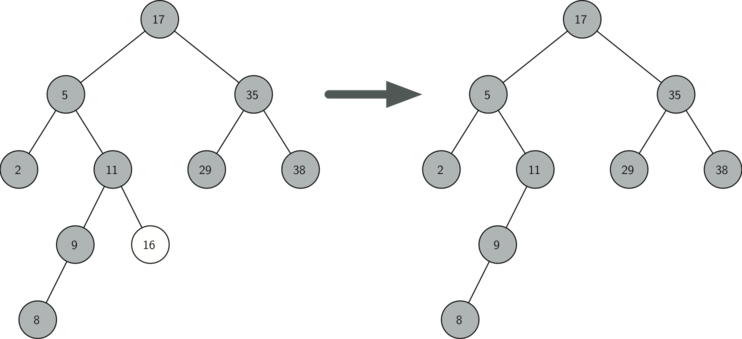

2. The node has 1 child
    * set the reference from the parent to the 1 child
    
<center>
<div>
<img src="bstdel2.png" width="700"/>
</div>
</center>
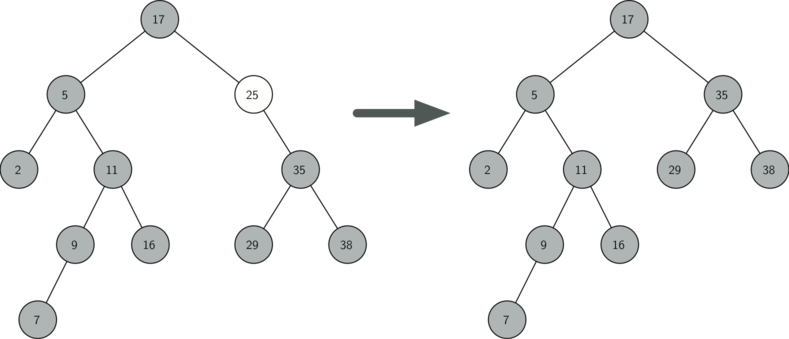

3. The node has 2 children
    * replace this node's value with that of its successor
    * delete the node that the successor value came from
  
<center>
<div>
<img src="bstdel3.png" width="700"/>
</div>
</center>

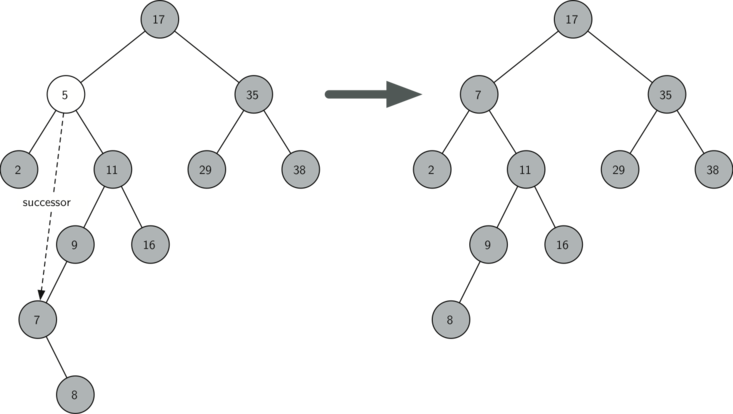

## Other Considerations

* the code will look different depending on whether the node being removed is itself a left child, a right child, or the root
* we haven't been keeping track of the number of items - how could we do that
* we _might_ be able to make a BST to implement an _ordered list_ ADT (defind here: [https://runestone.academy/ns/books/published/pythonds/BasicDS/TheOrderedListAbstractDataType.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/TheOrderedListAbstractDataType.html) ). 
    * The main difficulty is implementing an __index__ method - can you find the number of items in the tree that are _less than_ a given item?

## Unbalanced Binary Search Trees

In the worst case, a BST could be completely skewed in one direction

All operations: $O(n)$



<center>
<div>
<img src="skewedTree.png" width="300"/>
</div>
</center>

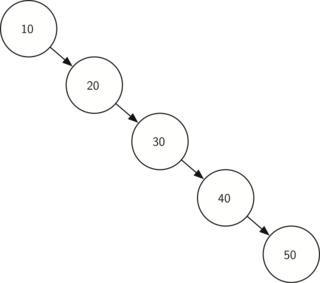

## Measuring Balance at Each Node

$balanceFactor = height(leftSubTree) - height(rightSubTree)$


<center>
<div>
<img src="unbalanced.png" width="300"/>
</div>
</center>
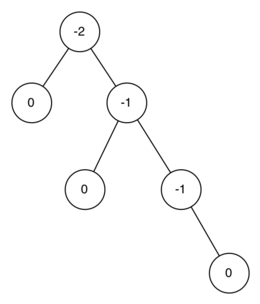

## Group Activity:

Calculate the balance at each of the nodes for this tree:

<center>
<div>
<img src="tree.png" width="300"/>
</div>
</center>

## AVL Trees

__Inventors:__ G.M. Adelson-Velskii and E.M. Landis, hence, the name __AVL__

__Idea:__ balance factor is only allowed to be 0, 1, or -1

__Approach:__ Whenever you add or remove items, if the balance factor is > 1 or < -1, perform _rotations_ to get it back in balance (check all nodes back up to the root)

__Result:__ The tree will bee guaranteed to have a height of at most $1.44*\log_2 N$

`add`, `search`, and `remove` will run in $O(\log N)$ time

## A simple left rotation

__Left Rotation__: Occurs when the right subtree of a node is too tall ($balance factor < -1$)

__Trigger__ : Insertion into the right subtree of the right child.
__Process__:
- The right child becomes the new root.
- The original root becomes the left child of the new root.
- Adjust any subtrees accordingly.

<center>
<div>
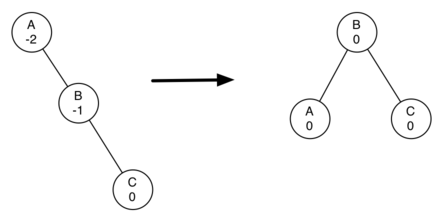
</div>
</center>

## A more complicated right rotation
__Right Rotation__: Occurs when the left subtree of a node is too tall ($balance factor > 1$)

__Trigger__: Insertion into the left subtree of the left child.
__Process__:
- The left child becomes the new root.
- The original root becomes the right child of the new root.
- Adjust any subtrees accordingly.

In this example we 
1. promote C in place of E
2. move C's right child (D) and make it into E's left child
3. make E the new right child of C

<center>
<div>
<img src="rightrotate1.png" width="550"/>
</div>
</center>
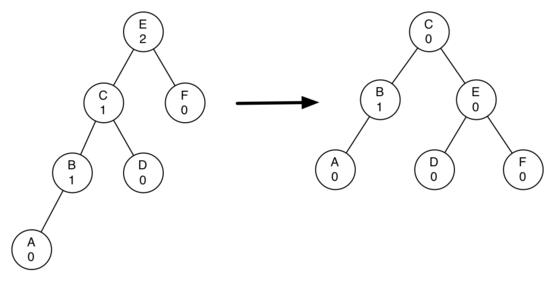

## Double Rotations
__Right Rotation__: Occurs when the left subtree of a node is too tall ($balance factor > 1$)

__Left Rotation__: Occurs when the right subtree of a node is too tall ($balance factor < -1$)

Sometimes rotating Right or Left doesn't solve the problem...
Problem:

<center>
<div>
<img src="hardunbalanced.png" width="150"/>
</div>
</center>

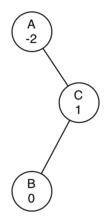

After left rotation:

<center>
<div>
<img src="badrotate.png" width="150"/>
</div>
</center>
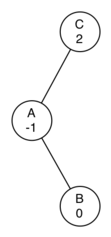

### Solution


$balanceFactor = -2$ and right child's $balanceFactor=1$, do right rotation on right child then left rotation at this node

$balanceFactor = 2$ and left child's $balanceFactor=-1$, do left rotation on left child then right rotation at this node

<center>
<div>
<img src="rotatelr.png" width="500"/>
</div>
</center>

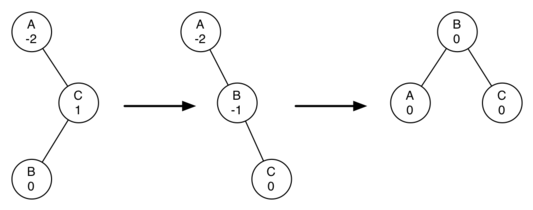

## Summary of Different Set Implementations

Which data structure should you use to implement a __Set__?

_Note: Maps are similar_ [https://runestone.academy/ns/books/published/pythonds/Trees/SummaryofMapADTImplementations.html](https://runestone.academy/ns/books/published/pythonds/Trees/SummaryofMapADTImplementations.html)

<table>

<colgroup>
<col style="width: 15%" />
<col style="width: 26%" />
<col style="width: 14%" />
<col style="width: 22%" />
<col style="width: 23%" />
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Operation</p></th>
<th class="head"><p>Sorted List</p></th>
<th class="head"><p>Hash Table*</p></th>
<th class="head"><p>Binary Search Tree</p></th>
<th class="head"><p>AVL Tree</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>add</p></td>
<td><p><span class="math notranslate nohighlight">\(O(n)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(1)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(n)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(\log_2{n})\)</span></p></td>
</tr>
<tr class="row-even"><td><p>in (search)</p></td>
<td><p><span class="math notranslate nohighlight">\(O(\log_2{n})\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(1)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(n)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(\log_2{n})\)</span></p></td>
</tr>
<tr class="row-odd"><td><p>remove</p></td>
<td><p><span class="math notranslate nohighlight">\(O(n)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(1)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(n)\)</span></p></td>
<td><p><span class="math notranslate nohighlight">\(O(\log_2{n})\)</span></p></td>
</tr>
</tbody>
</table>

* Hash Table is actually $O(1)$ in the _average case_, but this is usually achievable with a good hash function and low load factor

Is it ever better to use an AVL Tree instead of a Hash Table as the underlying data structure? Are there memory differences? What happens if you are adding and removing items a lot? What happens when the hash table fills up?

# Thank you!!

# Announcements

## You should be working on:
- [Final Project](https://analytics.drake.edu/~moore/CS66-F24/FinalProject.html), due 12/12 by 11:59 pm, to Blackboard.
- Exam #3 will be released at 12:15 pm today, and will also be due 12/12 by 11:59 pm.

## Course Evaluations

If you haven't already done so, please fill out the course evaluations:

[https://drake.qualtrics.com/jfe/form/SV_cuUpItUHL9vmzLE](https://drake.qualtrics.com/jfe/form/SV_cuUpItUHL9vmzLE)